In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
rng = np.random.default_rng(seed=17)
from statsmodels.tsa.stattools import pacf, acf

df = pd.read_csv('coeff.txt', sep=' ')
v = rng.normal(size=100)
err = rng.normal(scale=0.25, size=100)

RTSfn = pd.read_csv('RTSfn.txt', names=['RTSfn'], header=None)
rts2000 = pd.read_csv('2000rts1.txt', names=['rts2000'], header=None)

sns.set(rc={'figure.figsize':(14, 8)})

$$y(k) = 0.1 + 0.135\cdot y(k-1)  -0.207 \cdot y(k-2) + 0.315 \cdot y(k-3) + v(k) + 1 \cdot v(k-1) + 0 \cdot v(k-2) + 0 \cdot v(k-3) +\varepsilon$$

In [23]:
def find_y(v_array):
    y_list = []
    y_list.append(v_array[0]) #y_0
    y_list.append(v_array[1]) #y_1
    y_list.append(v_array[2]) #y_2
    y_list.append(df['a0'][0] + df['a1'][0]*y_list[2] + df['a2'][0]*y_list[1] + df['a3'][0]*y_list[0] + df['v(k)'][0]*v_array[3] + df['b1'][0]*v_array[2]) #y_3
    
    for ind, v in enumerate(v_array[3:-1], start=3):
        y = df['a0'][0] + df['a1'][0]*y_list[ind] + df['a2'][0]*y_list[ind-1] + df['a3'][0]*y_list[ind-2] + df['v(k)'][0]*v_array[ind+1] + df['b1'][0]*v_array[ind]
        y_list.append(y)
        
    return np.array(y_list)

In [24]:
def SMA_withpandas(data, N=5):
    return data.rolling(N).mean().dropna()

In [25]:
def EMA_withpandas(data, N=5):
    return data.ewm(span=N, min_periods=N).mean().dropna()

In [26]:
def find_autocorr(data, lag):
    corr = 0
    for index, value in enumerate(data):
        try:
            corr += (data.iloc[index+lag] - data.mean())*(value - data.mean())
        except:
            break
    corr = corr/data.var()/(len(data)-1)
    return corr

In [27]:
def findF(k, j, pacf_list):
    if k == j:
        return pacf_list[k-1]
    if k != j:
        return findF(k-1, j, pacf_list) - findF(k, k, pacf_list)*findF(k-1, k-j, pacf_list)

In [28]:
def findPACF(data, lags):
    pacf_list = [find_autocorr(data, lag=1)]

    autocorr_list = [find_autocorr(data, lag=1)]

    for k in range(2, lags):
        autocorr_list.append(find_autocorr(data, lag=k))

        verh = 0
        niz = 0

        for i in range(1, k):
            verh += findF(k-1, i, pacf_list)*autocorr_list[k-i-1]

        for i in range(1, k):
            niz += findF(k-1, i, pacf_list)*autocorr_list[i-1]

        pacf_list.append((autocorr_list[k-1] - verh)/(1 - niz))

    return pacf_list, autocorr_list

# v and y plot

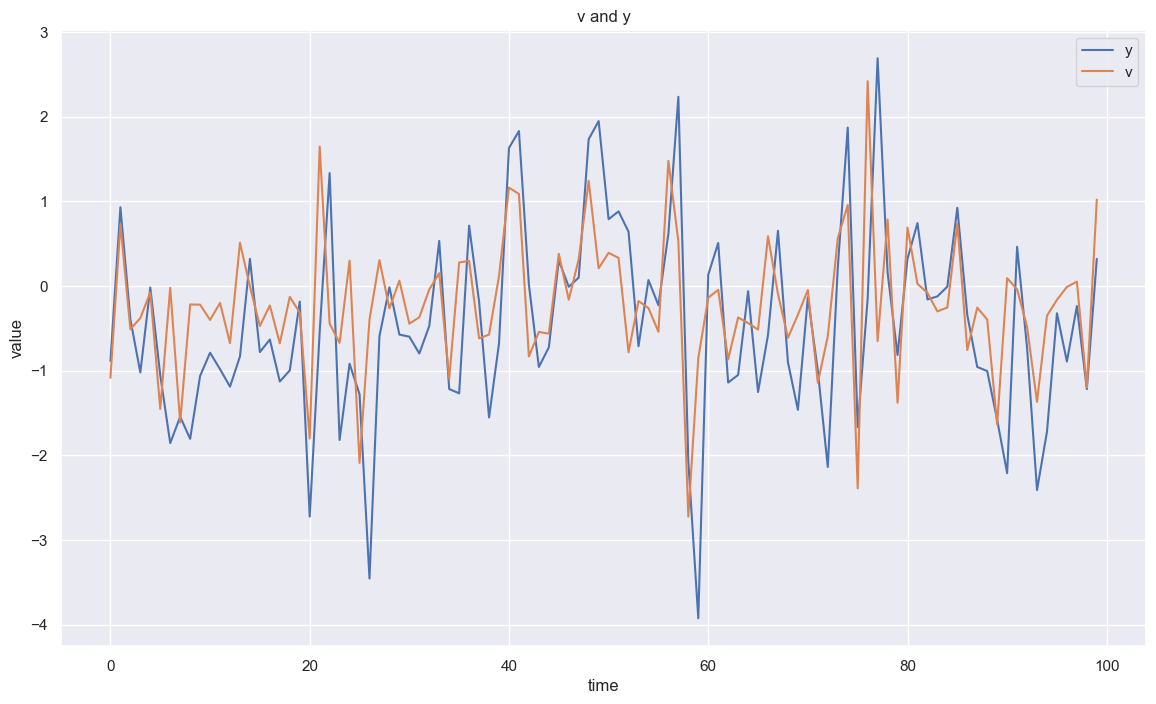

In [29]:
df = pd.read_csv('coeff.txt', sep=' ')
v = rng.normal(size=100)
err = rng.normal(scale=0.25, size=100)
y_train = find_y(v) + err

plt.plot(y_train, label='y')
plt.plot(v, label='v')
plt.xlabel('time')
plt.ylabel('value')
plt.title('v (MA) and y')
plt.legend()

# Друге завдання

## Plots for window size = 5 

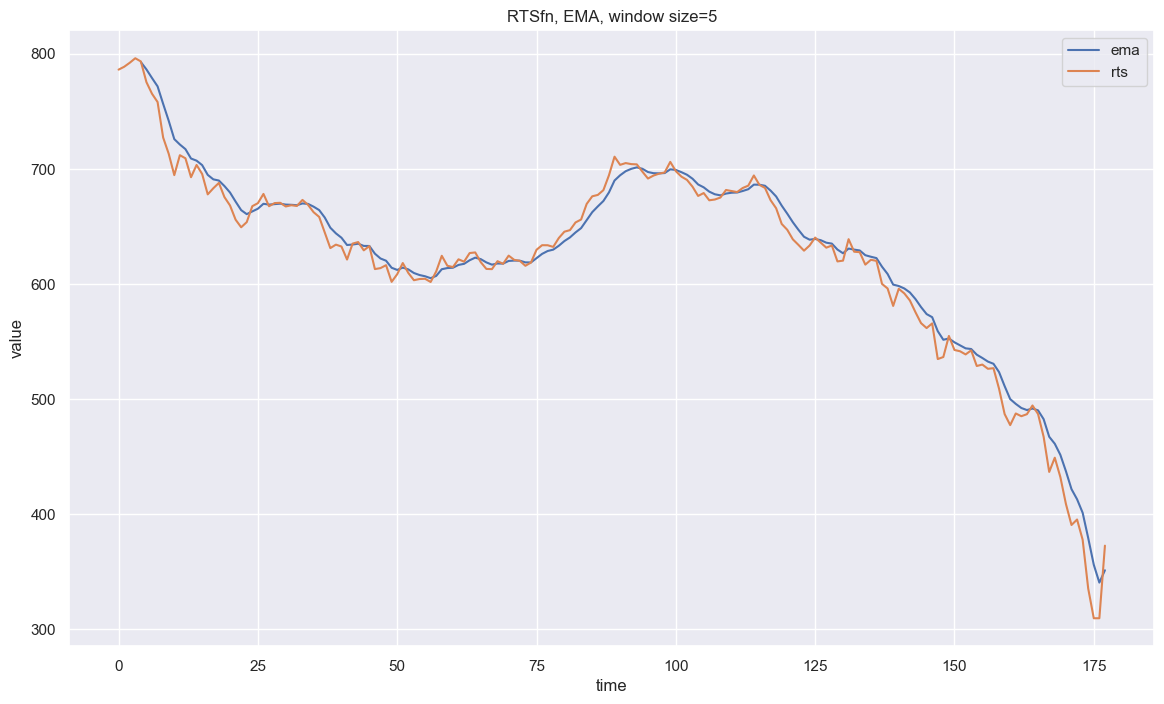

In [30]:
plt.plot(EMA_withpandas(RTSfn, N=5), label='ema')
plt.plot(RTSfn, label='rts')
plt.xlabel('time')
plt.ylabel('value')
plt.title('RTSfn, EMA, window size=5')
plt.legend()

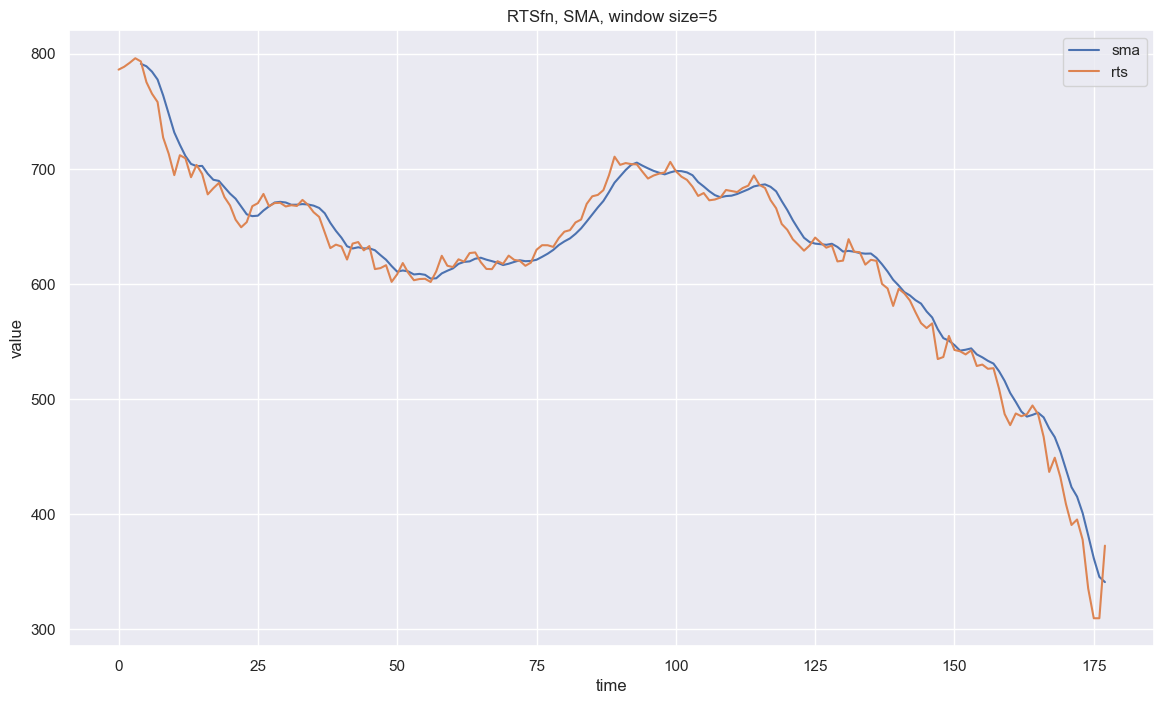

In [ ]:
plt.plot(SMA_withpandas(RTSfn, N=5), label='sma')
plt.plot(RTSfn, label='rts')
plt.xlabel('time')
plt.ylabel('value')
plt.title('RTSfn, SMA, window size=5')
plt.legend()

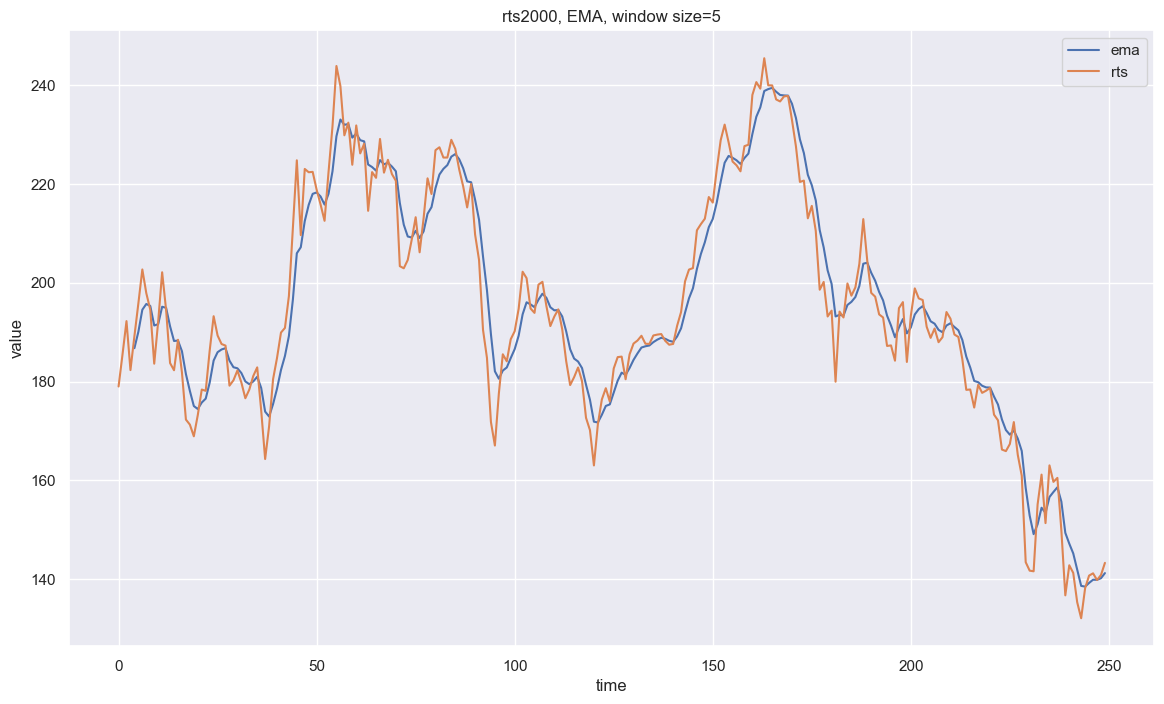

In [ ]:
plt.plot(EMA_withpandas(rts2000, N=5), label='ema')
plt.plot(rts2000, label='rts')
plt.xlabel('time')
plt.ylabel('value')
plt.title('rts2000, EMA, window size=5')
plt.legend()

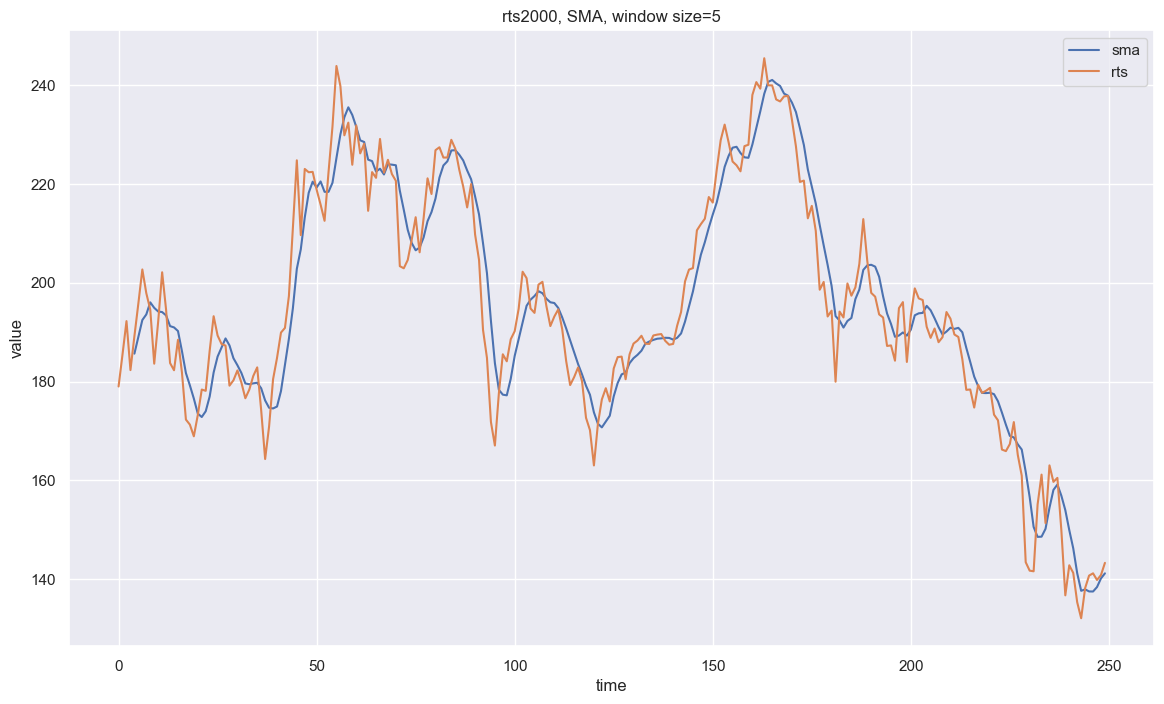

In [ ]:
plt.plot(SMA_withpandas(rts2000, N=5), label='sma')
plt.plot(rts2000, label='rts')
plt.xlabel('time')
plt.ylabel('value')
plt.title('rts2000, SMA, window size=5')
plt.legend()

## Plots for window size = 10

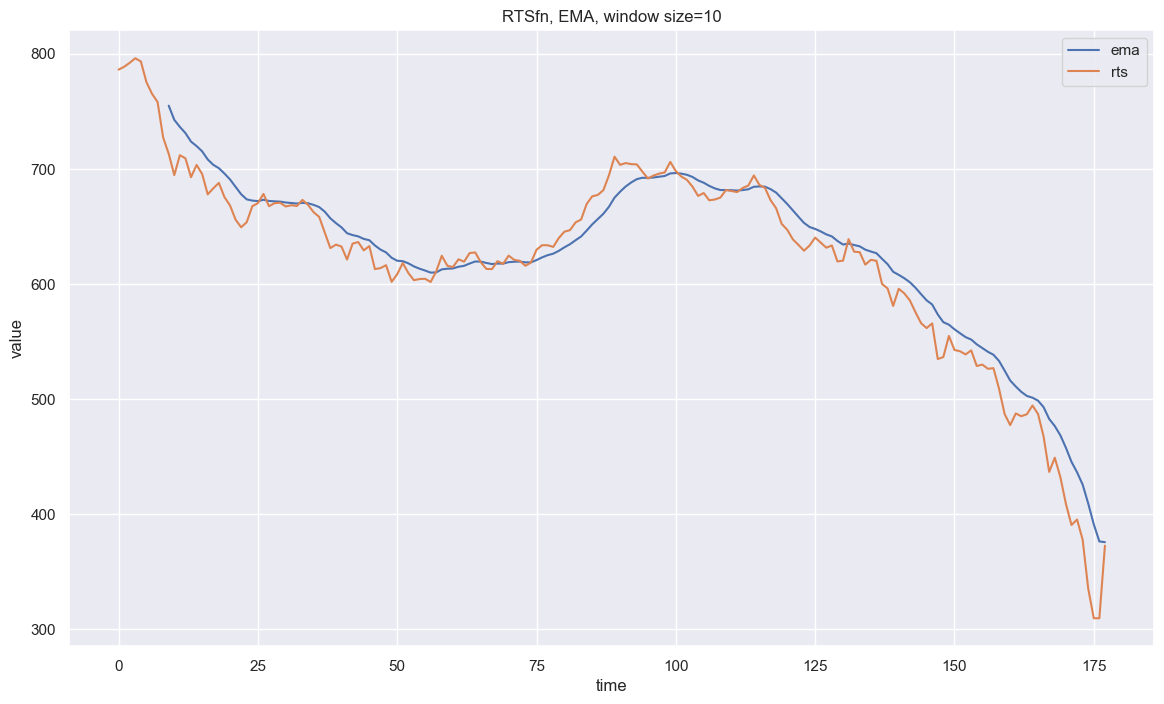

In [ ]:
plt.plot(EMA_withpandas(RTSfn, N=10), label='ema')
plt.plot(RTSfn, label='rts')
plt.xlabel('time')
plt.ylabel('value')
plt.title('RTSfn, EMA, window size=10')
plt.legend()

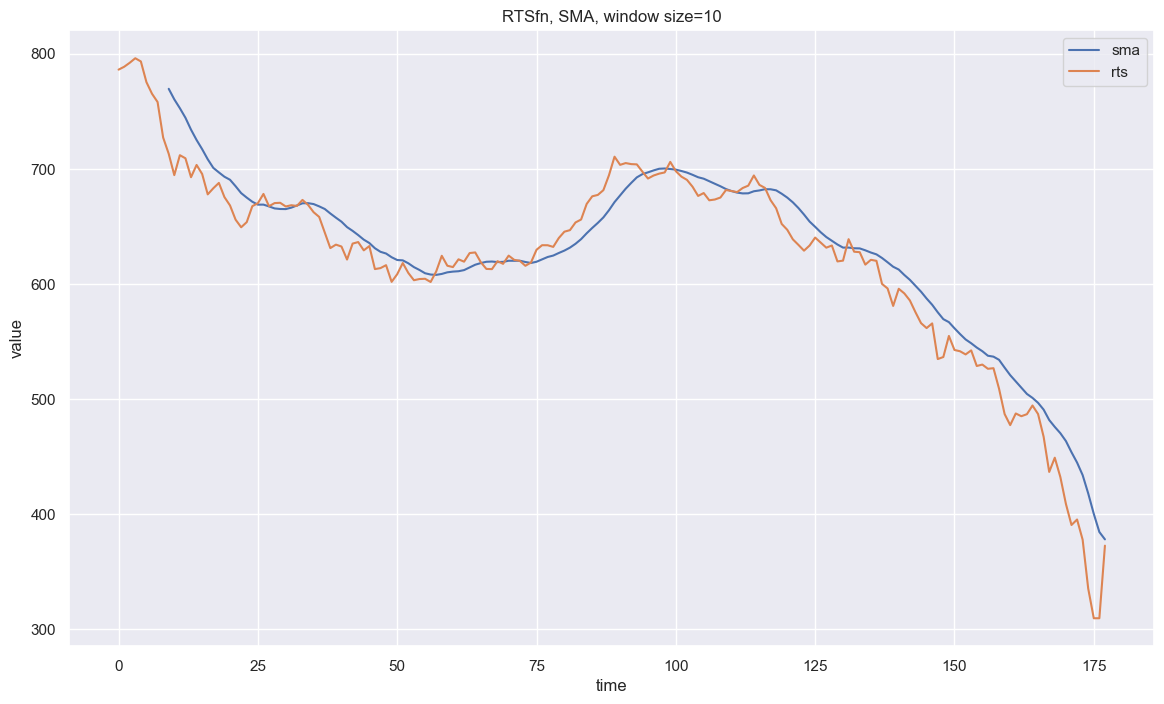

In [ ]:
plt.plot(SMA_withpandas(RTSfn, N=10), label='sma')
plt.plot(RTSfn, label='rts')
plt.xlabel('time')
plt.ylabel('value')
plt.title('RTSfn, SMA, window size=10')
plt.legend()

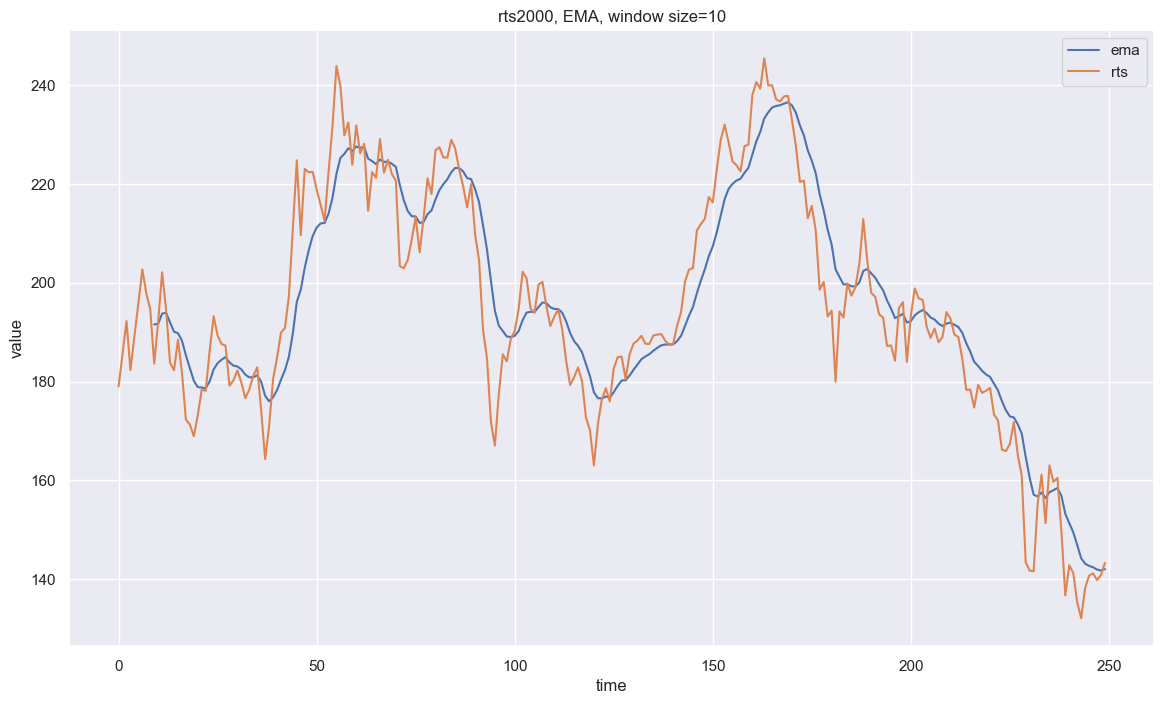

In [ ]:
plt.plot(EMA_withpandas(rts2000, N=10), label='ema')
plt.plot(rts2000, label='rts')
plt.xlabel('time')
plt.ylabel('value')
plt.title('rts2000, EMA, window size=10')
plt.legend()

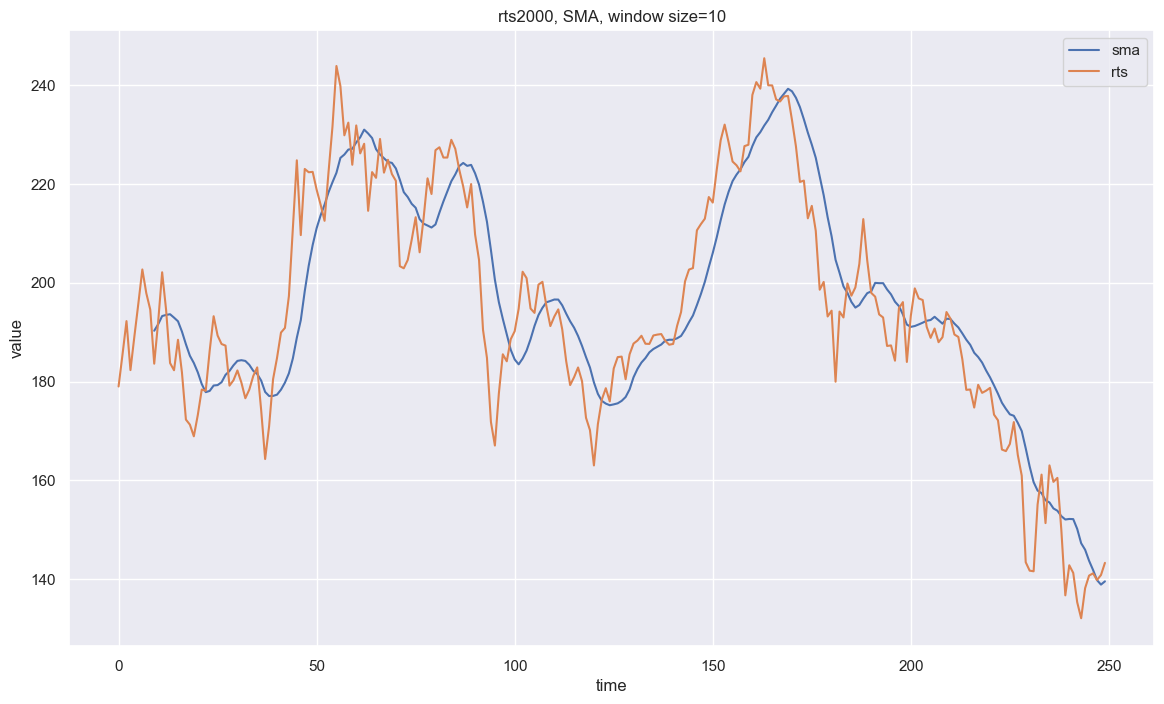

In [ ]:
plt.plot(SMA_withpandas(rts2000, N=10), label='sma')
plt.plot(rts2000, label='rts')
plt.xlabel('time')
plt.ylabel('value')
plt.title('rts2000, SMA, window size=10')
plt.legend()

In [ ]:
pacf_RTSfn, autocorr_RTSfn = findPACF(RTSfn['RTSfn'], 14)

pacf_RTSfn_usingstatmodels = pd.Series(pacf(RTSfn, nlags=13))
autocorr_RTSfn_usingstatmodels = acf(RTSfn['RTSfn'], nlags=13)

In [ ]:
pacf_RTSfn_comparison = pd.DataFrame({'Our function': pacf_RTSfn,
                                      'statsmodel': pacf_RTSfn_usingstatmodels[1:]})
pacf_RTSfn_comparison

,Our function,statsmodel
1,0.959669,0.965091
2,-0.204251,-0.237563
3,0.002277,0.011128
4,0.005495,0.006339
5,0.037992,0.045535
6,-0.004047,-0.007786
7,-0.028669,-0.034188
8,0.019816,0.026834
9,0.044802,0.054014
10,-0.007060,-0.012205


In [ ]:
autocorr_RTSfn_comparison = pd.DataFrame({'Our function': autocorr_RTSfn,
                                      'statsmodel': autocorr_RTSfn_usingstatmodels[1:]})
autocorr_RTSfn_comparison

,Our function,statsmodel
0,0.959669,0.959669
1,0.904821,0.904821
2,0.849845,0.849845
3,0.797956,0.797956
4,0.752156,0.752156
5,0.709945,0.709945
6,0.668188,0.668188
7,0.629499,0.629499
8,0.596681,0.596681
9,0.566544,0.566544


In [ ]:
pacf_rts2000, autocorr_rts2000 = findPACF(rts2000['rts2000'], 13)

pacf_rts2000_usingstatmodels = pd.Series(pacf(rts2000, nlags=12))
autocorr_rts2000_usingstatmodels = acf(rts2000, nlags=12)

In [ ]:
pacf_rts2000_comparison = pd.DataFrame({'Our function': pacf_rts2000,
                                      'statsmodel': pacf_rts2000_usingstatmodels[1:]})
pacf_rts2000_comparison

,Our function,statsmodel
1,0.960095,0.963951
2,-0.040179,-0.044536
3,-0.038285,-0.042444
4,0.048629,0.055159
5,-0.098697,-0.111527
6,-0.072834,-0.081990
7,-0.034158,-0.036898
8,0.113379,0.129857
9,0.042852,0.049167
10,-0.119763,-0.139543


In [ ]:
autocorr_rts2000_comparison = pd.DataFrame({'Our function': autocorr_rts2000,
                                      'statsmodel': autocorr_rts2000_usingstatmodels[1:]})
autocorr_rts2000_comparison

,Our function,statsmodel
0,0.960095,0.960095
1,0.918640,0.918640
2,0.875854,0.875854
3,0.838591,0.838591
4,0.795423,0.795423
5,0.748425,0.748425
6,0.700132,0.700132
7,0.663365,0.663365
8,0.632054,0.632054
9,0.593464,0.593464
